## Phase 3 Project Submission


Name : Edgar Kiprono

Student pace: DS-full time-Online

Submission Date : 8/03/2024

## Topic :  A study on H1N1 Vaccines uptake


1.Introduction

3.Business and Data Understanding

4.Findings

5.Modeling

6.Evaluation

7.Recommendations


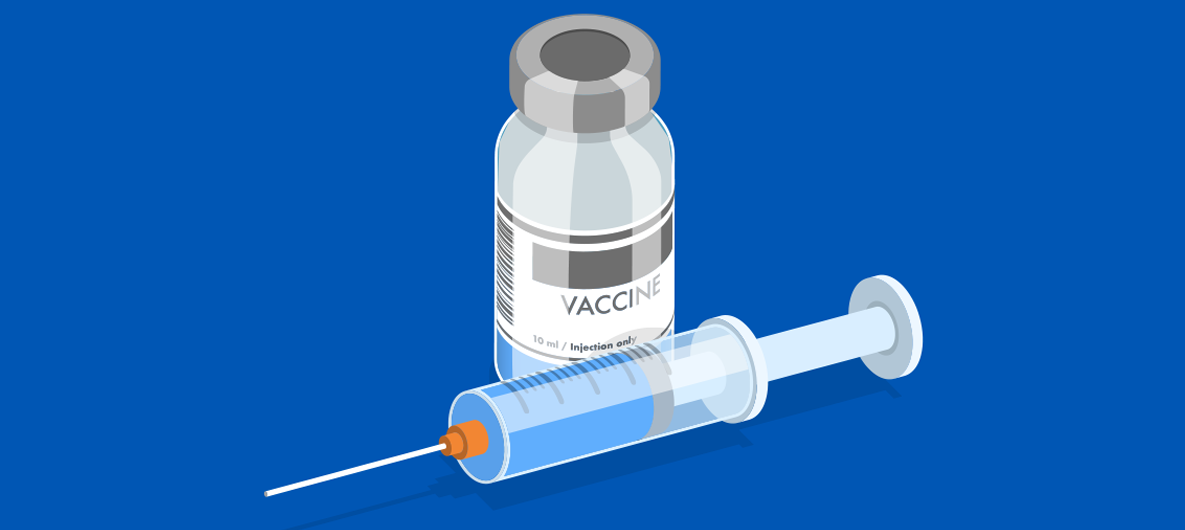
image COURTESY (https://www.aamc.org/news/new-covid-boosters-what-doctors-and-patients-need-know)

## Introduction


As the world grapples with the challenges posed by infectious diseases, the H1N1 flu stands out as significant threat to public health. The H1N1 influenza virus, commonly known as swine flu, emerged as a global pandemic in 2009, causing widespread illness and mortality. It posed particular risks to young adults and individuals with underlying health conditions. In response, extensive vaccination campaigns were launched to mitigate the impact of the virus. Vaccination remains a cornerstone of preventive measures against H1N1 flu , offering protection to individuals and communities. Understanding the factors influencing vaccination uptake is crucial for devising effective public health strategies and ensuring the widespread adoption of vaccination measures.

## Business Understanding

The study aims to predict whether individuals received the H1N1 flu vaccine vaccine based on data collected in the National 2009 H1N1 Flu Survey. This is valuable for guiding future public health efforts by understanding the factors influencing vaccination patterns. By identifying demographic, opinion, and health behavior factors associated with vaccination, stakeholders can tailor public health campaigns to increase vaccine uptake and mitigate the spread of infectious diseases.
Some of the potential stakeholders for this research include public health authorities such as World Health Organization (WHO)who are key stakeholders and can use can use predictive models to inform vaccination strategies.
Healthcare Providers to understand vaccination patterns can help healthcare providers target outreach efforts and improve patient educations: Academic researchers and public health institutions may use the insights gained from predictive modeling to conduct further studies on vaccine hesitancy, social determinants of health, and health behaviams.

### Business problem
The study aims to determine individuals' likelihood of receiving the H1N1 flu vaccine based on certain factors from the National 2009 H1N1 Flu Survey data. 


### Data Understanding
#### Data source

The data utilized in this analysis was sourced from Data Driven, a reputable provider of datasets and analytics solutions. Through their comprehensive data offerings, I was able to access valuable insights into individuals' vaccination behaviors gleaned from the National 2009 H1N1 Flu Survey

Access the data through(https://www.drivendata.org/competitions/66/flu-shot-learning/)

Datasets include 

             1.training set features
             2.test set features
             3.training labelsesented as short random character strings.

## Non Binary features in the dataset

The target variable is h1n1_vaccine - Whether respondent received H1N1 flu vaccine represented by binary variables: 0 = No(not vaccinated);Yes(vaccinated)

Dataset has 36 columns. The first column respondent_id is a unique and random identifier.
            For all binary variables: 0 = No; 1 = Yes

h1n1_concern - Level of concern about the H1N1 flu.
0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.

h1n1_knowledge - Level of knowledge about H1N1 flu.
0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.


opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.


opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.


In [47]:
#import the necessary libarries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score,precision_score,recall_score
from xgboost import XGBClassifier
import warnings
from matplotlib.lines import Line2D
warnings.filterwarnings('ignore') 

## Data Understanding
#### Dataset

In [48]:
df = pd.read_csv("Data/training_set_features.csv")
#view the first 5 rows of training dataset
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [49]:
df1= pd.read_csv("Data/training_set_labels.csv").set_index('respondent_id')
#view the data target labels
df1.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [50]:
df2 = pd.merge(df,df1, on='respondent_id').set_index('respondent_id')
#merge labels and dataframe
df2.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [51]:
#missing values
#filling the missing values using ffill to fill the missing value
#with the value foward in row
df2= df2.fillna(method='ffill')
#dropping last two rows that could not be filled with ffill
df2.dropna(inplace=True)

Choosing to fill the missing values with the value next to it seemed more effective than dropping since it would have dropped alot of rows and the model would not predict the actual relationship in the dataset

In [52]:
#dropping columns that relate to seasonal flu 
columns_to_drop = ['doctor_recc_seasonal', 'opinion_seas_vacc_effective', 'opinion_seas_risk',
                  'opinion_seas_sick_from_vacc','opinion_seas_sick_from_vacc','seasonal_vaccine','employment_industry','employment_occupation'] 
# List of columns to drop
df2.drop(columns=columns_to_drop, inplace=True)

Dropping columns that related to seasonal flu because we were majorly interested in H1N1 vaccine and also to reduce categorical columns to avoid alot of features when we get the dummies

In [53]:
#renaming column values e,g sex: female to 0 male to 1
df2['sex'] = df2['sex'].replace({'Female': 0, 'Male': 1})
df2['rent_or_own'] = df2['rent_or_own'].replace({'Rent': 0, 'Own': 1})
df2['marital_status'] = df2['marital_status'].replace({'Not Married': 0, 'Married': 1})
df2['sex'] = df2['sex'].astype(int)
df2['rent_or_own']=df2['rent_or_own'].astype(int)
df2['marital_status']=df2['marital_status'].astype(int)

In [54]:
# Assuming your DataFrame is called df3_train and df3_test
import pandas as pd

# Rename column in training set
df2.rename(columns={'education_< 12 Years': 'education_less_12_Years'}).head(1)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1,Below Poverty,0,0,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,0


In [55]:
#h1n1 vaccine value counts
df2["h1n1_vaccine"].value_counts()

h1n1_vaccine
0    21032
1     5674
Name: count, dtype: int64

more individuals are not vaccinated compared to those vaccinated

In [56]:
# Calculate value counts for each category in the column
value_counts = df2["h1n1_vaccine"].value_counts()
# Calculate total number of observations
total_obs = len(df2)
# Calculate percentage of value counts
percentage_counts = (value_counts / total_obs) * 100
print(percentage_counts)

h1n1_vaccine
0    78.753838
1    21.246162
Name: count, dtype: float64


This shows the percentage of those vaccinated and those not vaccinated

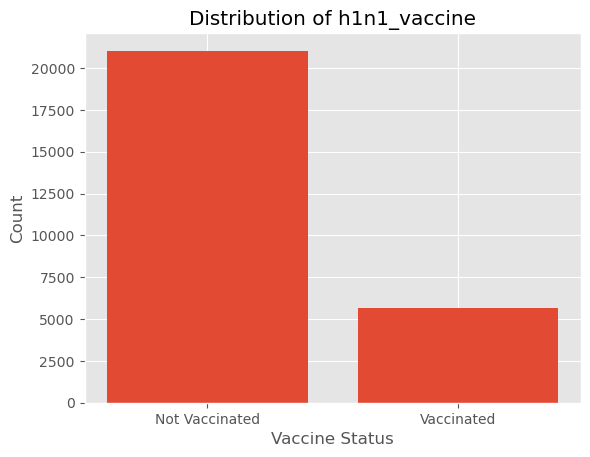

In [57]:
#plotting graph of vaccination counts
# Set the style
plt.style.use('ggplot')
vaccine_counts = df2["h1n1_vaccine"].value_counts()
plt.bar(vaccine_counts.index, vaccine_counts.values)
plt.xlabel("Vaccine Status")
plt.ylabel("Count")
plt.title("Distribution of h1n1_vaccine")
plt.xticks([0, 1], ['Not Vaccinated', 'Vaccinated'])
plt.show()
plt.show()


### Vaccination distribution by Gender Female/Male

In [58]:
#vaccination by gender value counts
gender_distribution = df2.groupby(['sex'])['h1n1_vaccine'].value_counts()
gender_distribution

sex  h1n1_vaccine
0    0               12377
     1                3480
1    0                8655
     1                2194
Name: count, dtype: int64

Distribution count shows that more females are vaccinated compared to males and more females are also not vaccinated compared to males

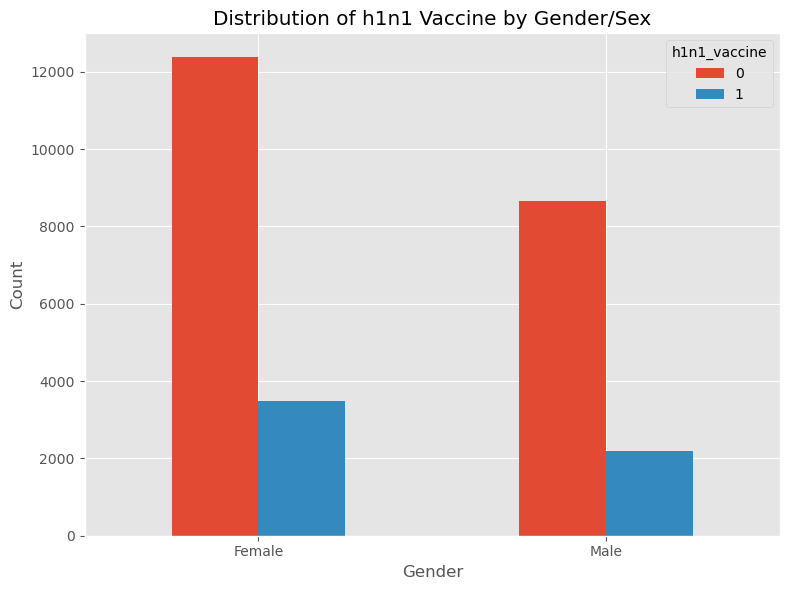

In [59]:
gender_distribution_df = gender_distribution.unstack().fillna(0)
plt.style.use('ggplot')
# Plotting
gender_distribution_df.plot(kind='bar', figsize=(8, 6))
plt.title('Distribution of h1n1 Vaccine by Gender/Sex')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'],rotation=0)
plt.tight_layout()
plt.show()

In [60]:
# Group by 'age_group' and 'gender' and calculate value counts for 'h1n1_vaccine'
agegroup_distribution = df2.groupby(['age_group'])['h1n1_vaccine'].value_counts()
agegroup_distribution

age_group      h1n1_vaccine
18 - 34 Years  0               4224
               1                991
35 - 44 Years  0               3087
               1                761
45 - 54 Years  0               4218
               1               1020
55 - 64 Years  0               4211
               1               1351
65+ Years      0               5292
               1               1551
Name: count, dtype: int64

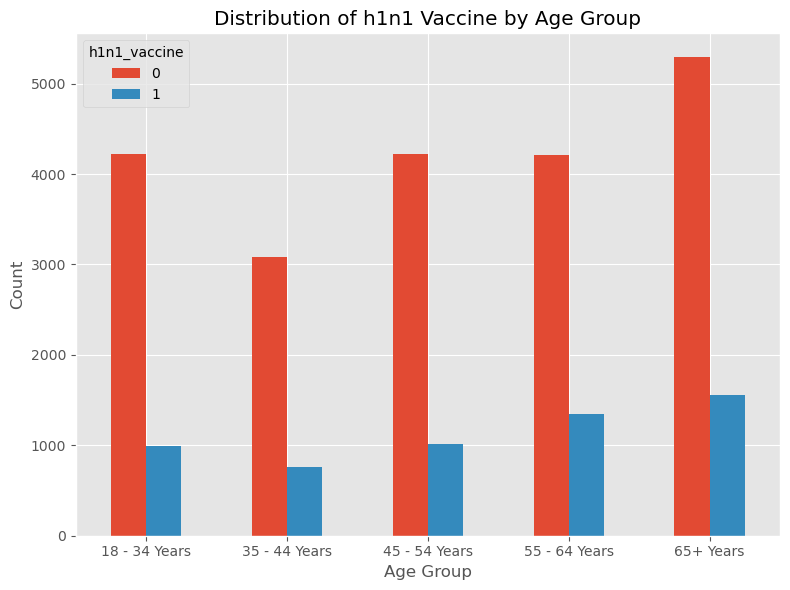

In [61]:
#vaccination counts by age group
agegroup_distribution_df = agegroup_distribution.unstack().fillna(0)
plt.style.use('ggplot')
# Plotting
agegroup_distribution_df.plot(kind='bar', figsize=(8, 6))
plt.title('Distribution of h1n1 Vaccine by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


From the graph it shows that more number of those vaccinated were 65 years and above with the lowest vaccination happening between ages 35-44 years

### Knowledge distribution vs to vaccination

In [62]:
#vaccination counts by vaccine knowledge
knowledge_distribution = df2.groupby(['h1n1_knowledge'])['h1n1_vaccine'].value_counts()
knowledge_distribution

h1n1_knowledge  h1n1_vaccine
0.0             0                2148
                1                 362
1.0             0               11995
                1                2665
2.0             0                6889
                1                2647
Name: count, dtype: int64

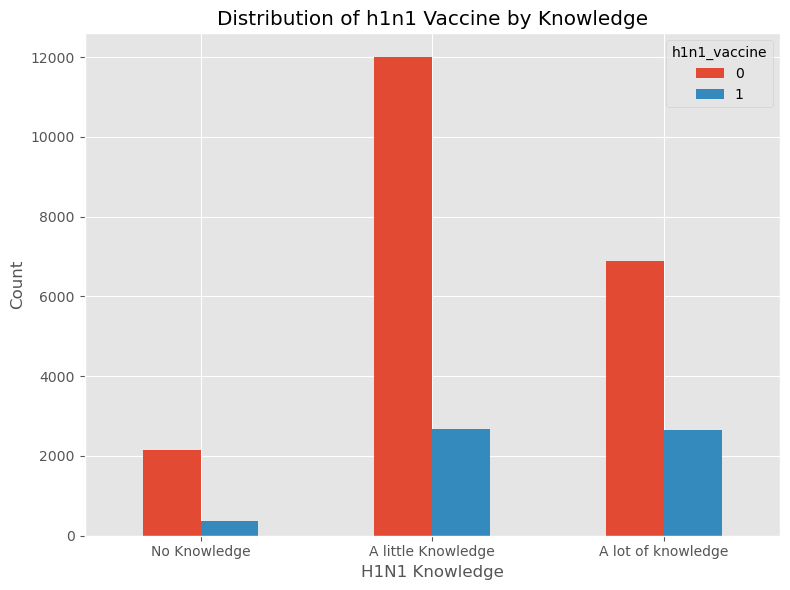

In [63]:
#plotting graph
knowledge_distribution_df = knowledge_distribution.unstack().fillna(0)
plt.style.use('ggplot')
# Plotting
knowledge_distribution_df.plot(kind='bar', figsize=(8, 6))
plt.title('Distribution of h1n1 Vaccine by Knowledge')
plt.xlabel('H1N1 Knowledge')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['No Knowledge', 'A little Knowledge', 'A lot of knowledge'], rotation=0)

plt.tight_layout()
plt.show()


In [64]:
#vaccination graph according to individual knowledge
concern_distribution = df2.groupby(['h1n1_concern'])['h1n1_vaccine'].value_counts()
concern_distribution

h1n1_concern  h1n1_vaccine
0.0           0               2856
              1                449
1.0           0               6781
              1               1400
2.0           0               8136
              1               2483
3.0           0               3259
              1               1342
Name: count, dtype: int64

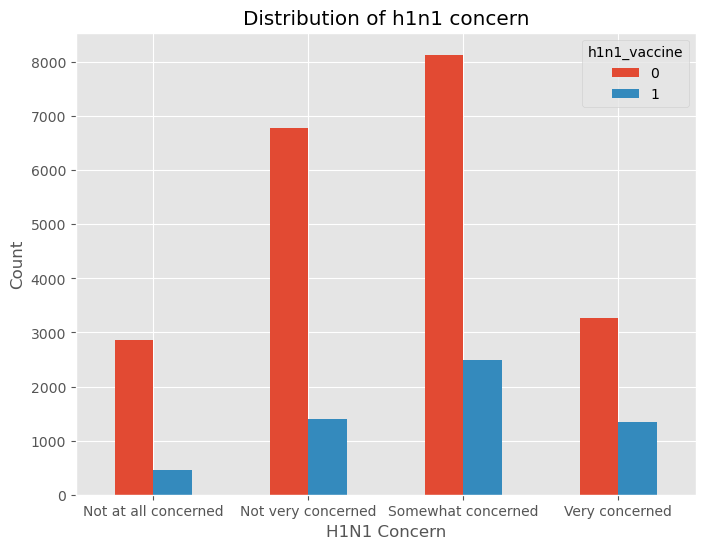

In [65]:
#graph of concern vs vaccination
concern_distribution_df = concern_distribution.unstack().fillna(0)
plt.style.use('ggplot')
# Plotting
concern_distribution_df.plot(kind='bar', figsize=(8, 6))
plt.xlabel("H1N1 Concern")
plt.ylabel("Count")
plt.title("Distribution of h1n1 concern")
plt.xticks([0, 1, 2,3], ['Not at all concerned','Not very concerned','Somewhat concerned','Very concerned'], rotation=0)
plt.show()


more individuals who were somewhat concerned were vaccinated more compared to the othere levels of concerned but also had the highest number of those not vaccinated.

### Distribution of race vs h1n1 vaccine

<Axes: xlabel='h1n1_vaccine', ylabel='count'>

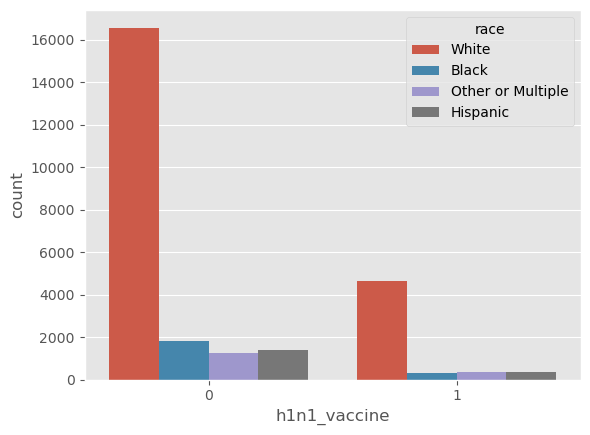

In [66]:
#h1n1 vaccination vs race
plt.style.use('ggplot')
sns.countplot(x=df2["h1n1_vaccine"], hue=df2["race"], data=df2)

m0re whites were vaccinated compared to the other races with the lowest vaccination happening to the hispanic race 

In [115]:
df_copy= df2.copy()
df_dummy = pd.get_dummies(df_copy, drop_first=True)
corr_matrix = df_dummy.corr()

# Generate the correlation heatmap
# plt.figure(figsize=(12, 10))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# plt.title('Correlation Matrix between Variables')
# plt.show();
df_dummy.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA
respondent_id,,,,,,,,,,,,,,,,,,,,,
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,False
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,False,False,False,True,False,False,False,False,True,False
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,True,False,False
5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,False,True,False


### Summary distribution of other features

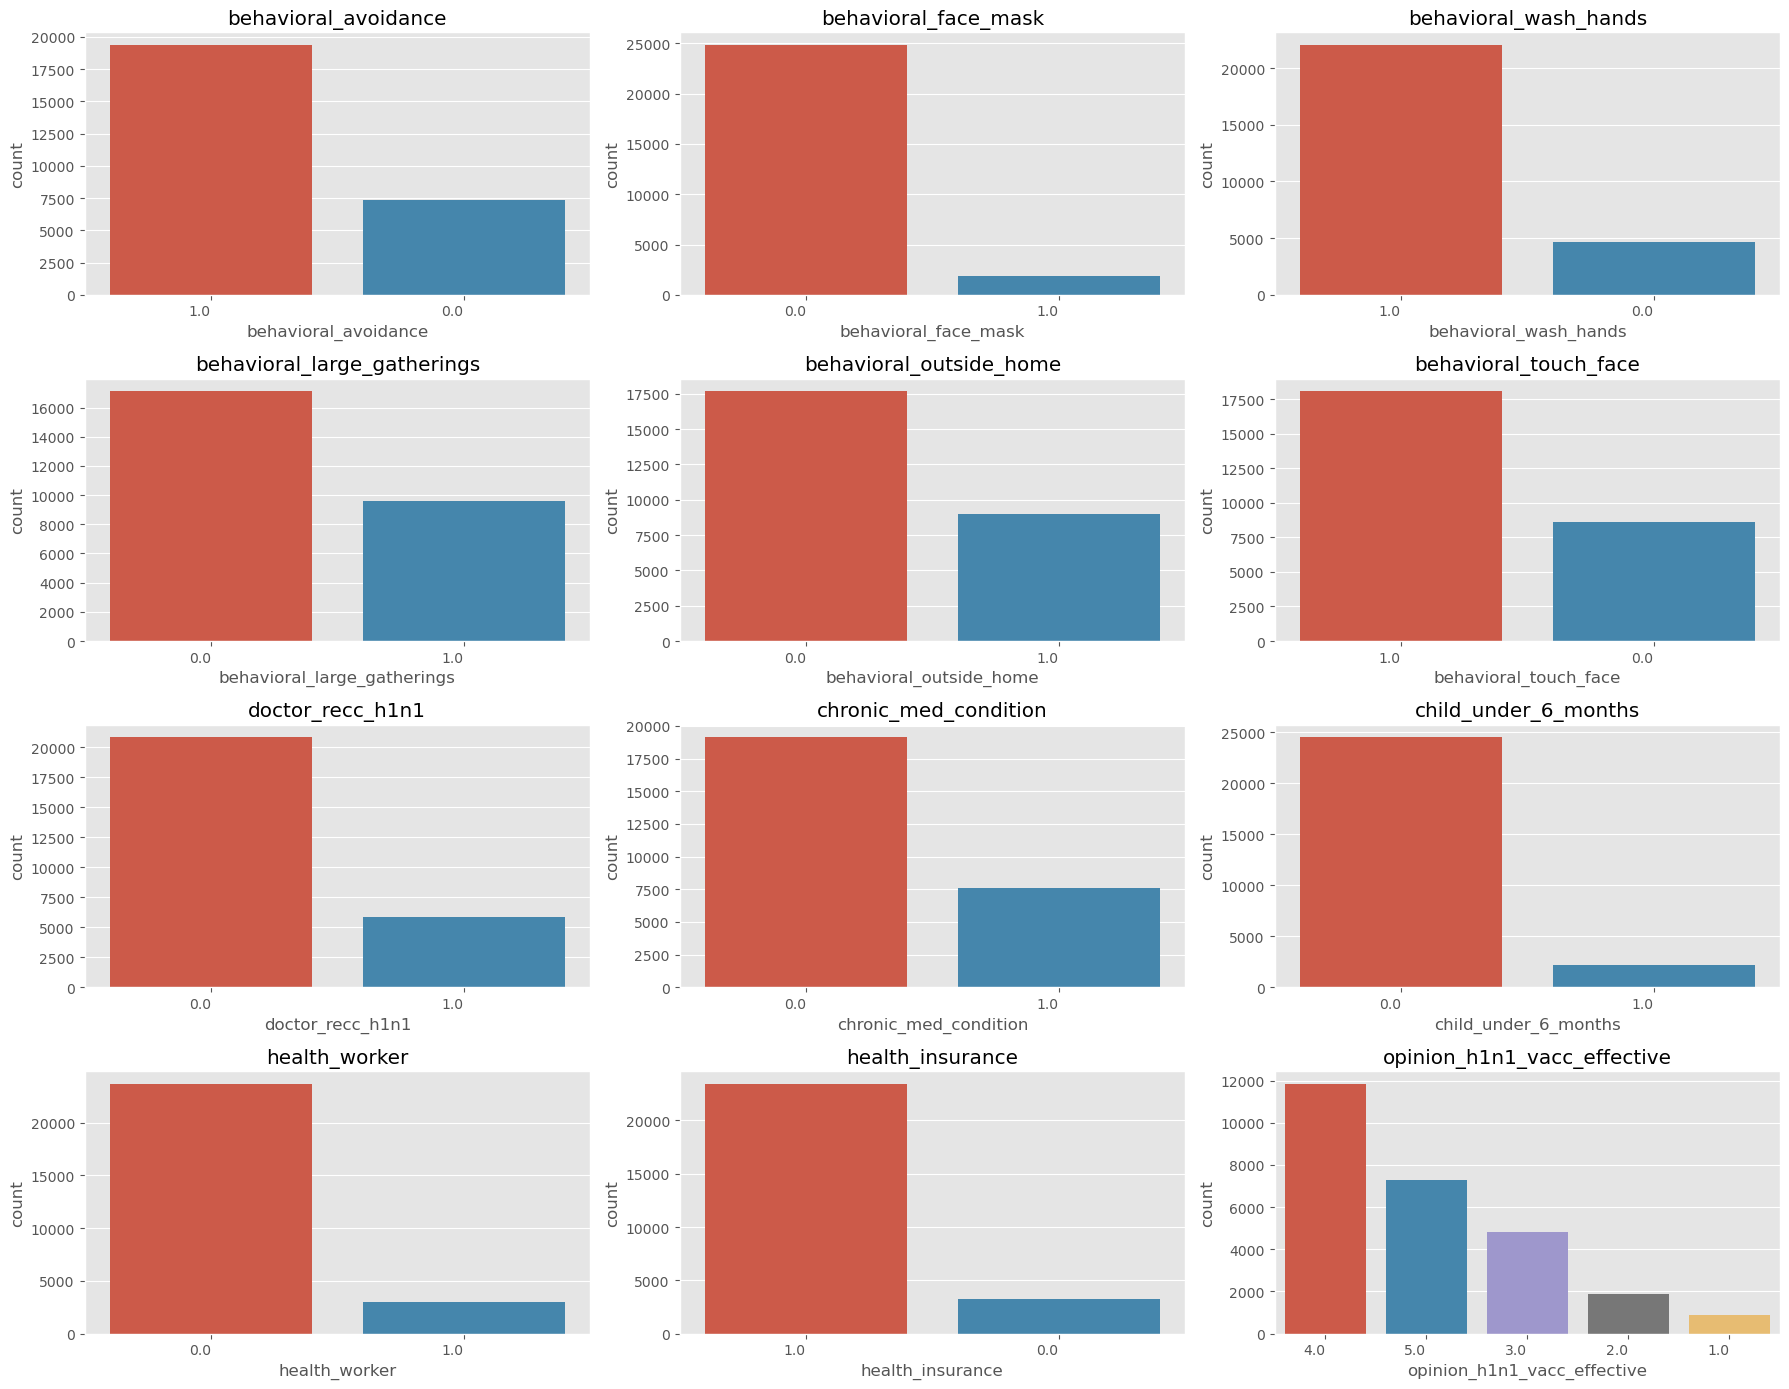

In [67]:
# visualizing distribution of the other dataset features as summary
plt.style.use('ggplot')

# Plotting
plt.figure(figsize=(18, 14))
for i, column in enumerate(df2.columns[3:15]):  # Limiting to the first 12 column
    plt.subplot(4, 3, i + 1)
    sns.countplot(x=column, data=df2,order=df2[column].value_counts().index)
    plt.title(column)
    plt.xticks(ha='right')

plt.tight_layout()
plt.show()


## MODELLING

The dataset has quite a number of categorical variables.get_dummies will be use to convert the categorical variables to int type datatype

In [68]:
#definin our X and y variables
# X variable has to target variable
#y variable has the target columns(h1n1 vaccine)
X =df2.iloc[:,:-1]
y = df2[['h1n1_vaccine']]

#splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#getting the dummy variables for the categorical variables
df3_train = pd.get_dummies(X_train, drop_first=True)
df3_test = pd.get_dummies(X_test, drop_first=True)

#converting the dummy variables to int type
df3_train = df3_train.astype(int)
df3_test = df3_test.astype(int)

The dummy variables are created after doing the train test split to avoid data leakage and ensures that the encoding is applied independently to the training and test sets. Data leakage refers to the situation where information from the test set unintentionally influences the model training process, leading to overly optimistic performance estimates.


### Class Imbalance

In [69]:
# Training set
print('Train imbalance')
train_imb = y_train.value_counts()
print(train_imb)
print('--------------------------')
# Test set
# Training set
print('Test imbalance')
test_imb = y_test.value_counts()
print(test_imb)

Train imbalance
h1n1_vaccine
0               16800
1                4564
Name: count, dtype: int64
--------------------------
Test imbalance
h1n1_vaccine
0               4232
1               1110
Name: count, dtype: int64


The above indicates significant class imbalance between individuals who received the H1N1 vaccine (1) and those who did not (0) in both the training and test datasets. In the training data, there are 16,800 instances of individuals not receiving the vaccine compared to 4,564 instances of individuals receiving it. Similarly, in the test data, there are 4,232 instances of individuals not receiving the vaccine compared to 1,110 instances of individuals receiving it. Class imbalance can pose challenges for predictive modeling, as the model may have difficulty learning from the minority class and may exhibit biased predictions towards the majority class

In [70]:
from imblearn.over_sampling import RandomOverSampler
# Instantiate RandomOverSampler
ros = RandomOverSampler(random_state=42)
# Fit ROS to training data
X_train_resampled, y_train_resampled = ros.fit_resample(df3_train, y_train)

RandomOverSampler is a technique used to address class imbalance in classification tasks. It works by randomly duplicating instances from the minority class (less represented class) until the class distribution is balanced with that of the majority class. 

This will not limit us to only use ROS we will also use SMOTE for class balancing

## Non parametric Models
## Baseline model
### Decision Trees

In [85]:
#instantiate Decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
# smote = SMOTE(random_state=42)
# X_train_resamp, y_train_resamp = smote.fit_resample(df3_train, y_train)
clf.fit(X_train_resampled, y_train_resampled)

#predicting test data

y_pred = clf.predict(df3_test)

acc = accuracy_score(y_test,y_pred)
print(f'Decision tree Accuracy :{acc}')

# AUC score
auc_score = roc_auc_score(y_test, y_pred)
print("AUC Score:", auc_score)

Decision tree Accuracy :0.749906402096593
AUC Score: 0.6354625419370221


The reported accuracy of 0.7499 indicates that the decision tree classifier correctly predicted the class label for approximately 75% of the instances in the dataset.The AUC (Area Under the ROC Curve) score of 0.6354 suggests that the classifier is able to to distinguish between the positive and negative classes is slightly better than random guessing.

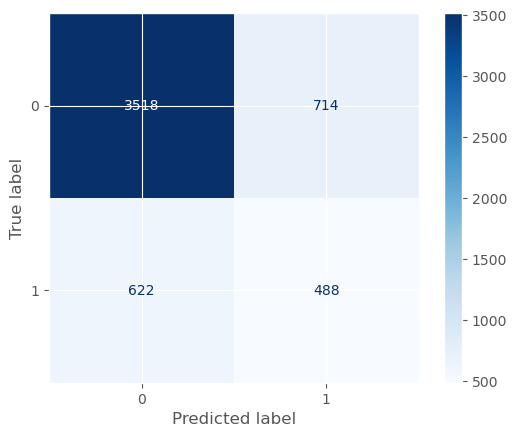

In [86]:

cnf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)

In this case, there are 3518 true negatives (correctly predicted as 0), 488 true positives (correctly predicted as 1), 714 false negatives (predicted as 0 but actually 1), and 622 false positives (predicted as 1 but actually 0).
Overall, the model appears to have more success in predicting class 0, as evidenced by the higher numbers in the first column. However, it struggles more with predicting class 1, as shown by the higher false negative count in the second column.

### GridSearchCV
#### Tuning Decision Tree hyperparameters

Addressing class imbalance with SMOTE

In [76]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Initialize DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resamp, y_train_resamp = smote.fit_resample(df3_train, y_train)

# Cross-validation
dt_cv_score = cross_val_score(dt_clf, X_train_resamp, y_train_resamp, cv=10)
mean_dt_cv_score = np.mean(dt_cv_score)

# Print the mean cross-validation score
print("Mean Cross-Validation Score :", mean_dt_cv_score)


Mean Cross-Validation Score : 0.7892559523809524


In [77]:
# Train the decision tree classifier using the resampled training data
dt_clf.fit(X_train_resamp, y_train_resamp)

# Make predictions on the test data
y_pred = dt_clf.predict(df3_test)

# Calculate accuracy on the test data
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred)

# Print the test accuracy
print("Test Accuracy (with SMOTE):", test_accuracy)

Test Accuracy (with SMOTE): 0.6944964432796705


The model obtained an accuracy of 78.92% on the training data  but did not perform quiet well on the test data with an accuracy of 69.45%

### Using random over sampler on decision tree to adress class imbalance

In [173]:
from sklearn.model_selection import cross_val_score
dt_clf = DecisionTreeClassifier(random_state=42)

#cross validation
dt_cv_score = cross_val_score(dt_clf, df3_train, y_train, cv=10)
mean_dt_cv_score = np.mean(dt_cv_score)
#mean cross validation for a 10 fold cross validation
mean_dt_cv_score

0.7412005611843409

The cross-validation score for a Decision Tree classifier on the training data is approximately 0.7477. This indicates that, on average, the model correctly classifies about 74.21% of the samples in the training data when evaluated using 10-fold cross-validation.

In [174]:
dt_clf.fit(df3_train, y_train)

# Prediction on the test data
y_pred_test = dt_clf.predict(df3_test)
#accuracy on the test data
test_accuracy = accuracy_score(y_test, y_pred_test)
# Print the test accuracy
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.7450393111194309


The model performs 0.7450% on the test data.This means that the model correctly classifies about 74.50% of the samples in the test data.

### GridSearchCV - DEcision Trees

In [175]:
#hyperparameters to tune
dt_param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 2, 3, 4, 5, 6],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6],
}

dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=5, return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_train_resampled, y_train_resampled)
# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_["mean_train_score"])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(df3_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")

dt_grid_search.best_params_

Mean Training Score: 77.22%
Mean Test Score: 75.80%
Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

The results of the grid search for tuning a decision tree model revealed a notable improvement in performance compared to the initial model.

The mean training score of 77.22% indicates that, on average, the decision tree model correctly predicted approximately 77.22% of the training set instances. This signifies a considerable enhancement from the initial decision tree's performance of 74.

Similarly, the mean test score of 75.80% demonstrates the model's ability to generalize well to unseen data. With a test accuracy of 75.80%, the tuned decision tree achieved a significant improvement over the baseline model's performance.

### KNN Model

In [210]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn_clf = KNeighborsClassifier()

# Fit the classifier to the training data
knn_clf.fit(X_train_resamp, y_train_resamp)


KNeighborsClassifier()

In [211]:
accuracy_train = knn_clf.score(X_train_resamp, y_train_resamp)
print("Accuracy on training data:", accuracy_train)

Accuracy on training data: 0.8469940476190476


In [181]:
# Make predictions on the test data
y_pred_knn = knn_clf.predict(df3_test)

# Calculate the accuracy of the KNN classifier
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of KNN:", accuracy_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
print("Precision of KNN:", precision_knn)
print("Recall of KNN:", recall_knn)
print("F1-score of KNN:", f1_knn)


Accuracy of KNN: 0.7006739049045302
Precision of KNN: 0.367479674796748
Recall of KNN: 0.6108108108108108
F1-score of KNN: 0.4588832487309645


Accuracy: The model correctly classifies approximately 70.07% of the samples in the dataset.Precision: Of all the samples predicted as positive by the model, approximately 36.75% are actually positive.Recall: The model correctly identifies approximately 61.08% of all actual positive samples in the dataset
F1-score: The harmonic mean of precision and recall is approximately 45.89%.The KNN model demonstrates moderate accuracy in its predictions, with relatively low precision but higher recall. The F1-score reflects a relationship between precision and recall, suggesting a reasonable balance between the two metrics.

## Ensembling Methods

### Random Forest

In [105]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100,max_depth=10)
forest.fit(X_train_resamp, y_train_resamp)
rf_train_acc = forest.score(X_train_resamp, y_train_resamp)
print(f"Training Accuracy: {rf_train_acc}")

Training Accuracy: 0.7858630952380953


The random forest had an improved accuracy of 78.59% compared to our baseline model(74%)

In [106]:
# Assuming RandomForestClassifier model is already trained and named 'forest'

# Find test accuracy
rf_test_acc = forest.score(df3_test, y_test)
print(f"Test Accuracy: {rf_test_acc}")


Test Accuracy: 0.7650692624485211


on the test data the model performed quite well with an accuracy of 76.51% which was quite an improvement on the decision tree test data whihc had 61%

### Random Forest Grid Search

### Cross validation

In [110]:
rf_clf =RandomForestClassifier(random_state = 42)
mean_rf_cv_score = np.mean(cross_val_score(rf_clf,X_train_resamp, y_train_resamp, cv=10))

print(
    f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}"
)

Mean Cross Validation Score for Random Forest Classifier: 87.25%


Mean cross validation of a 10 cross fold on random forest provided an accuracy of 87.25% a great improvement from the baseline model which as 75%

#### Tuning the hyperparameters of the random forest model

In [122]:
rf_param_grid = {
    "n_estimators": [10, 30, 100],
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 2, 6, 10],
    "min_samples_split": [5, 10],
    "min_samples_leaf": [3, 6],
}

rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3)
rf_grid_search.fit(X_train_resamp, y_train_resamp)

print(f"Optimal Parameters: {rf_grid_search.best_params_}")
print("------------------------------------------------------")
print(f"Accuracy: {rf_grid_search.best_score_ :.2%}")

Optimal Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}
------------------------------------------------------
Accuracy: 81.25%


The accuracy of the random forest after grid search increase slightly from the decision tree grid search

In [112]:
dt_score = dt_grid_search.score(df3_test, y_test)
rf_score = rf_grid_search.score(df3_test, y_test)

print("Decision tree grid search: ", dt_score)
print("Random forest grid search: ", rf_score)

Decision tree grid search:  0.7579558217895919
Random forest grid search:  0.7894047173343317


## Ensembling Methods

### Adaboost and Gradient Boosting

In [114]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
# Instantiate an AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(random_state=42)

# Instantiate an GradientBoostingClassifier
gbt_clf = GradientBoostingClassifier(random_state=42)

adaboost_clf.fit(X_train_resampled, y_train_resampled)
gbt_clf.fit(X_train_resampled, y_train_resampled)
# AdaBoost model predictions
adaboost_train_preds = adaboost_clf.predict(df3_train)
adaboost_test_preds = adaboost_clf.predict(df3_test)

# GradientBoosting model predictions
gbt_clf_train_preds = gbt_clf.predict(df3_train)
gbt_clf_test_preds = gbt_clf.predict(df3_test)

def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print(f"Model: {model_name}")
    print(f"Accuracy: {acc}")
    print(f"F1-Score: {f1}")
    
print("Training Metrics")
display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics
Model: AdaBoost
Accuracy: 0.7676933158584535
F1-Score: 0.5721920524092751

Model: Gradient Boosted Trees
Accuracy: 0.7710634712600637
F1-Score: 0.5796304254404813

Testing Metrics
Model: AdaBoost
Accuracy: 0.7652564582553351
F1-Score: 0.5627615062761506

Model: Gradient Boosted Trees
Accuracy: 0.7635716959940098
F1-Score: 0.5628245067497404


In [115]:
adaboost_confusion_matrix = confusion_matrix(y_test, adaboost_test_preds)
adaboost_confusion_matrix


array([[3281,  951],
       [ 303,  807]], dtype=int64)

True Negatives (TN): 3,281 instances were correctly classified as negative (actual negative, predicted negative).
False Positives (FP): 951 instances were incorrectly classified as positive (actual negative, predicted positive).
False Negatives (FN): 303 instances were incorrectly classified as negative (actual positive, predicted negative).
True Positives (TP): 807 instances were correctly classified as positive (actual positive, predicted positive).

In [316]:
gbt_confusion_matrix = confusion_matrix(y_test, gbt_clf_test_preds)
gbt_confusion_matrix

array([[3266,  966],
       [ 297,  813]], dtype=int64)

True Negatives (TN): 3,266 instances were correctly classified as negative (actual negative, predicted negative).
False Positives (FP): 966 instances were incorrectly classified as positive (actual negative, predicted positive).
False Negatives (FN): 297 instances were incorrectly classified as negative (actual positive, predicted negative).
True Positives (TP): 813 instances were correctly classified as positive (actual positive, predicted positive).

The model's performance is reasonably good, with a higher number of true negatives and true positives compared to false negatives and false positives.

In [317]:
adaboost_classification_report = classification_report(y_test, adaboost_test_preds)
print(adaboost_classification_report)

              precision    recall  f1-score   support

           0       0.92      0.78      0.84      4232
           1       0.46      0.73      0.56      1110

    accuracy                           0.77      5342
   macro avg       0.69      0.75      0.70      5342
weighted avg       0.82      0.77      0.78      5342



Precision: For the "not vaccinated" class (0), the precision is high at 0.92,for the "vaccinated" class (1), the precision is lower at 0.46

Recall: The recall for the "not vaccinated" class (0) is 0.70 .The recall for the "vaccinated" class (1) is higher at 0.73

F1-score: The F1-score, which balances precision and recall, is 0.84 for the "not vaccinated" class and 0.56 for the "vaccinated" class. A higher F1-score indicates better performance, considering both precision and recall.

Accuracy: The overall accuracy of the model is 0.77, indicating that it correctly predicts the H1N1 vaccine uptake for 77% of the individuals in the dataset.

In [318]:
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      4232
           1       0.46      0.73      0.56      1110

    accuracy                           0.76      5342
   macro avg       0.69      0.75      0.70      5342
weighted avg       0.82      0.76      0.78      5342



Precision: For the "not vaccinated" class (0), the precision is high at 0.92,for the "vaccinated" class (1), the precision is lower at 0.46

Recall: The recall for the "not vaccinated" class (0) is 0.77, meaning that the model correctly identifies 77% of individuals who are actually not vaccinated. In contrast, the recall for the "vaccinated" class (1) is higher at 0.73, indicating that the model captures 73% of individuals who are actually vaccinated.

F1-score: The F1-score, which balances precision and recall, is 0.84 for the "not vaccinated" class and 0.56 for the "vaccinated" class.

Accuracy: The overall accuracy of the model is 0.76

## XGB Boost Model

In [117]:
#searching for column name with the less than sign because on the XGB classifier complexity
for column_name in df3_train.columns:
    if '[' in column_name or ']' in column_name or '<' in column_name:
        print("Column name with forbidden characters:", column_name)


Column name with forbidden characters: education_< 12 Years


In [99]:
# Renaming column in training set
df3_train = df3_train.rename(columns={'education_< 12 Years': 'education_less_12_Years'})
# Renaming column in test set (if needed)
df3_test = df3_test.rename(columns={'education_< 12 Years': 'education_less_12_Years'})

Renaming our df["education"] columns to remove (<) since XGB classifier does not support signs on feature names

In [120]:

# Instantiate XGBClassifier
clf = XGBClassifier()

# Fit XGBClassifier
clf.fit(df3_train, y_train)

# Predict on training and test sets
training_preds = clf.predict(df3_train)
test_preds = clf.predict(df3_test)

# Accuracy of training and test sets
XGB_train_accuracy = accuracy_score(y_train, training_preds)
XGB_test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(XGB_train_accuracy * 100))
print('Test Accuracy: {:.4}%'.format(XGB_test_accuracy * 100))

Training Accuracy: 90.93%
Test Accuracy: 83.36%


The model gets an accuracy of almost 90% on the training data but works poorly on the test data. This could be as a sign of overfitting

### Tuning XGB Model with Grid Search

Tuning the model a little bit more to avoid overfitting

In [322]:
# defining parameter values for GridSearch
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}
#Instantsiating GridSearchCV
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(df3_train, y_train)

best_parameters = grid_clf.best_params_
#iterating throught thr param grid to fing the best optimal parameters
print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))
#predicting our train and test df
training_preds = grid_clf.predict(df3_train)
test_preds = grid_clf.predict(df3_test)

#finding the accuracy score for train and test data
XGB_training_accuracy = accuracy_score(y_train, training_preds)
XGB_test_accuracy = accuracy_score(y_test, test_preds)

print('--------------------------------------------------')
print('Training Accuracy: {:.4}%'.format(XGB_training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(XGB_test_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 2
n_estimators: 100
subsample: 0.7
--------------------------------------------------
Training Accuracy: 86.87%
Validation accuracy: 83.7%


Training Accuracy:86.87%: The model achieves a high level of accuracy on the training data, indicating that it effectively learns the underlying patterns and relationships present in the training dataset. This high training accuracy suggests that the model has successfully captured the complexities of the data during the training process.

Test Accuracy83.736%: The model also performs well on unseen data, achieving an accuracy of 8736% on the test dataset. This indicates that the model generalizes well to new, previously unseen instances, demonstrating its ability to make accurate predictions on real-world data.

### Feature Importance

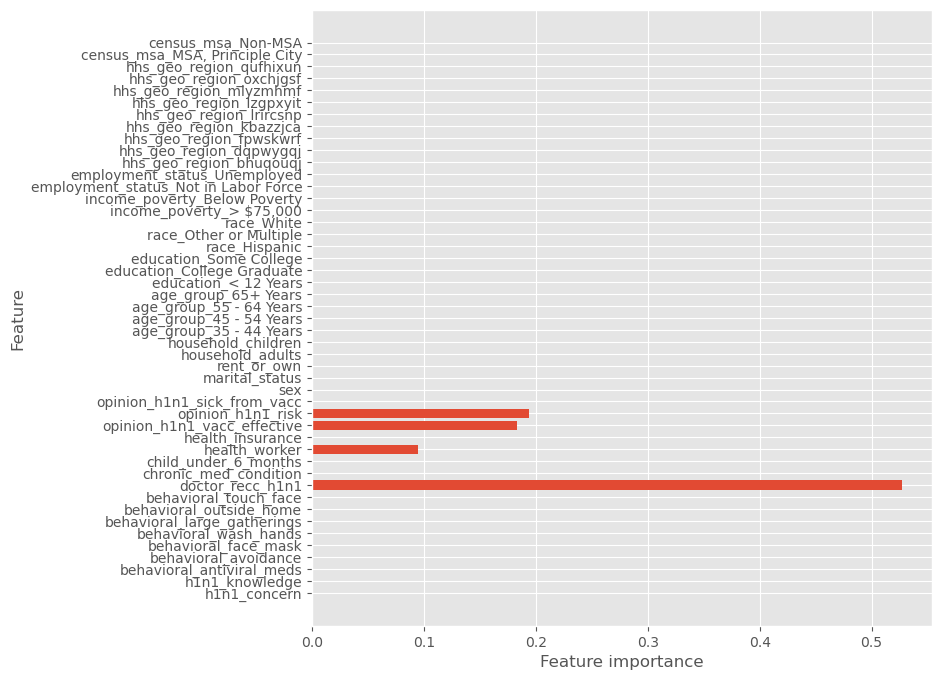

In [102]:
tree_clf = XGBClassifier(n_estimators=5,max_features=10,max_depth=2) 
tree_clf.fit(df3_train, y_train)
def plot_feature_importances(model):
    n_features = X_train_resamp.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train_resamp.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

from the above features feature importance analysis for the XGBoost model revealed that the most influential factor in predicting H1N1 vaccine uptake was doctor recommendation, followed by individual opinions on the perceived risk of H1N1 and the effectiveness of the vaccine. This underscores the significant impact of healthcare professionals' recommendations and public perceptions on vaccination decisions. Understanding these influential factors can inform targeted public health interventions and communication strategies aimed at increasing vaccine uptake and combating infectious diseases effectively.

### Conclusions

it is evident that a significant portion of the population remains unvaccinated, indicating potential gaps in vaccination campaigns or barriers to accessing vaccines. 
The higher vaccination rate among females suggests that they may be more receptive to vaccination messages or have better access to healthcare services.
The higher vaccination rates among individuals aged 34-44 may be attributed to their increased awareness of vaccine-preventable diseases or their role as caregivers for young children or elderly relatives
Factors such as language barriers, cultural beliefs, and mistrust of healthcare systems may contribute to lower vaccination rates among certain racial or ethnic groups.
addressing vaccination disparities requires a multifaceted approach that addresses social, cultural, and knowledge-related barriers to vaccine access and acceptance. By targeting specific demographic groups, tailoring communication strategies, and promoting health literacy, public health authorities can improve vaccine coverage

### Model Conclusions


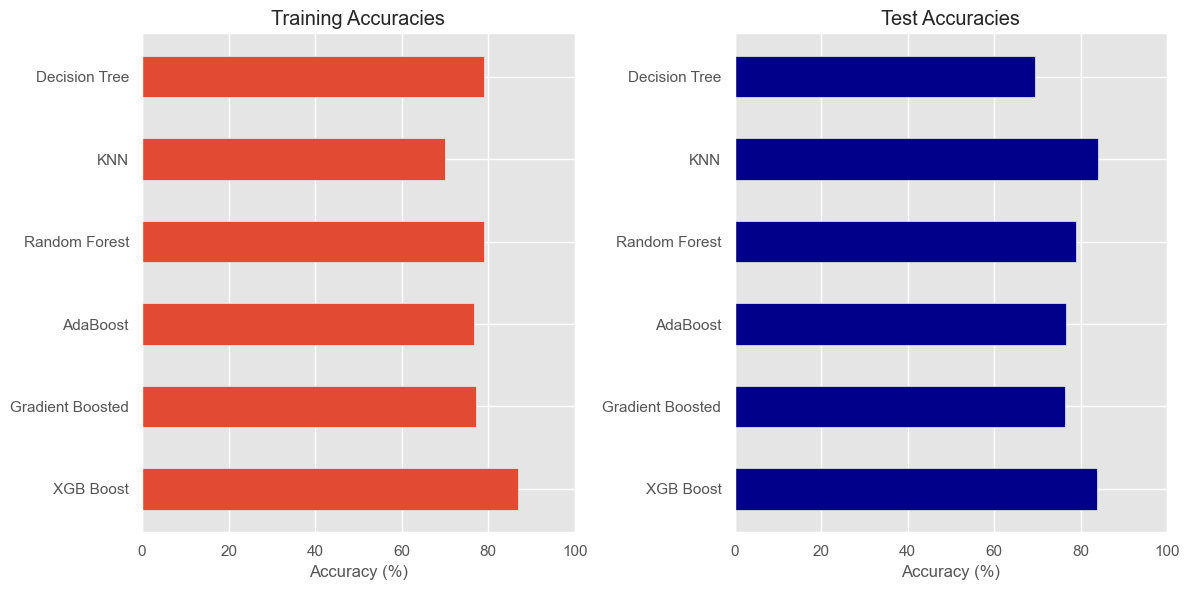

In [213]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['XGB Boost', 'Gradient Boosted', 'AdaBoost', 'Random Forest', 'KNN', 'Decision Tree']

# Training and test accuracies
training_accuracies = [86.87, 77.11, 76.76, 78.94, 70.07, 78.93]
test_accuracies = [83.7, 76.36, 76.53, 78.94, 84, 69.45]

# Create subplots with two columns
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot training accuracies
ax1.barh(models, training_accuracies,height=0.5)
ax1.set_title('Training Accuracies')
ax1.set_xlabel('Accuracy (%)')
ax1.set_xlim(0, 100)

# Plot test accuracies
ax2.barh(models, test_accuracies, color='darkblue', height=0.5)
ax2.set_title('Test Accuracies')
ax2.set_xlabel('Accuracy (%)')
ax2.set_xlim(0, 100)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


XGB Boost: Achieves the highest training accuracy of 86.87% and a test accuracy of 83.7%. This indicates that the model generalizes well to unseen data, as it maintains a high accuracy on both the training and test sets. Which makes it the best model to use

Gradient Boosted and AdaBoost: Shows high training accuracy and a similar test accuracy . While the training accuracy is relatively high, the test accuracy is slightly lower, suggesting some overfitting or a failure to generalize to unseen data.

KNN: Shows a training accuracy of 70.07% and a relatively high test accuracy of 84%. While KNN performs well on the test data, its lower training accuracy suggests that it may be underfitting or failing to capture the underlying patterns in the training data effectively.

Decision Tree: Exhibits a training accuracy of 78.93% and a test accuracy of 69.45%. Like Random Forest, Decision Tree achieves similar accuracies on both training and test sets. However, the lower test accuracy indicates that the model may not generalize well to unseen data.n.

### Recommendations

By understanding the factors influencing vaccination patterns, stakeholders can tailor vaccination campaigns, allocate resources effectively, and make informed decisions to improve public health outcomes

Moving forward, continued collaboration between stakeholders and researchers is essential for translating these insights into tangible public health interventions and addressing the challenges posed by infectious diseases

Further research is needed to explore additional features and refine the predictive models for better accuracy and generalizability.

Continuous monitoring and evaluation of vaccination campaigns and public health interventions are crucial for assessing the impact of the predictive models and guiding future strategies.

Collaboration and knowledge sharing among public health authorities, healthcare providers, and researchers are essential for leveraging the insights gained from predictive modeling to improve vaccination uptake and mitigate the spread of infectious diseases.